# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('cleaned-data-kbk.csv', index_col=0)
df.head()

,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid yang melanda dunia terutama indo...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid landa dunia indonesia dampak sig...
2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('Train size: ', X_train_tfidf.shape)
print('Test size: ', X_test_tfidf.shape)

Train size:  (884, 2300)
Test size:  (380, 2300)


In [4]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

           term       rank
45         ajar  74.310959
1866      siswa  34.673976
1887        smk  33.582109
977     kembang  32.745617
972       kelas  31.869886
...         ...        ...
1548      plant   0.220052
529      doubly   0.220052
1777     sarima   0.200231
1022  komoditas   0.200231
129       arima   0.200231

[2300 rows x 2 columns]



# Oversampling: SMOTE

In [5]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [6]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Telematics loT System and Devices                                                194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Ketenegakerjaan Teknologi dan Kejuruan                                           194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Strategi Pembelajaran Teknologi dan Kejuruan                     

# Training Model

## GridSearchCV

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, scoring='f1_macro', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, kernel=rbf, score=0.692, total=   1.6s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.719, total=   1.6s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.783, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.828, total=   1.7s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.870, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.865, total=   1.6s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.839, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.884, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.845, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.0min finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1_macro', verbose=3)

In [8]:
# Tabel hasil GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.440707,0.046885,0.112809,0.012074,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.691625,0.718706,0.782844,0.827866,0.870197,0.864817,0.839155,0.884367,0.845094,0.890018,0.821469,0.065370,10
1,1.572777,0.028019,0.108108,0.020576,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.698299,0.703651,0.780972,0.755060,0.687885,0.704207,0.672617,0.630048,0.641714,0.720835,0.699529,0.043865,12
2,1.249195,0.124011,0.131409,0.056583,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.726569,0.733861,0.784920,0.791640,0.834523,0.854771,0.843750,0.844089,0.852828,0.839776,0.810673,0.046203,11
3,0.718604,0.033925,0.069705,0.005081,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.918518,0.930719,0.943879,0.960387,0.983539,0.966274,0.979619,0.978964,0.987771,0.996045,0.964572,0.024572,3
4,1.183488,0.061595,0.067707,0.004198,1,poly,"{'C': 1, 'kernel': 'poly'}",0.906466,0.896391,0.915244,0.951017,0.970956,0.961817,0.962437,0.959058,0.979143,0.995949,0.949848,0.031232,4
5,0.482936,0.017016,0.059005,0.004050,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.870371,0.881172,0.865008,0.892217,0.947281,0.966768,0.955355,0.954706,0.932204,0.972477,0.923756,0.039893,8
6,0.673651,0.011308,0.063004,0.002933,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.942473,0.934318,0.947779,0.960387,0.983539,0.966795,0.983693,0.978964,0.983611,0.996045,0.967761,0.019728,1
7,1.088581,0.018860,0.054504,0.005390,10,poly,"{'C': 10, 'kernel': 'poly'}",0.922276,0.895463,0.902644,0.943151,0.966817,0.957664,0.957454,0.950806,0.974756,0.991880,0.946291,0.029427,5
8,0.386529,0.008958,0.035902,0.001700,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.893564,0.913717,0.878399,0.917287,0.957584,0.949899,0.953872,0.955968,0.963437,0.991974,0.937570,0.033472,7
9,0.675850,0.012586,0.061204,0.004143,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.942473,0.934318,0.947779,0.960387,0.983539,0.966795,0.983693,0.978964,0.983611,0.996045,0.967761,0.019728,1


In [9]:
# Peringkat Score Parameter hasil GridSearchCV
grid_results[['rank_test_score', 'params', 'mean_test_score']].sort_values(by=['rank_test_score'])

,rank_test_score,params,mean_test_score
6,1,"{'C': 10, 'kernel': 'rbf'}",0.967761
9,1,"{'C': 100, 'kernel': 'rbf'}",0.967761
3,3,"{'C': 1, 'kernel': 'rbf'}",0.964572
4,4,"{'C': 1, 'kernel': 'poly'}",0.949848
7,5,"{'C': 10, 'kernel': 'poly'}",0.946291
10,5,"{'C': 100, 'kernel': 'poly'}",0.946291
8,7,"{'C': 10, 'kernel': 'sigmoid'}",0.937570
5,8,"{'C': 1, 'kernel': 'sigmoid'}",0.923756
11,9,"{'C': 100, 'kernel': 'sigmoid'}",0.917060
0,10,"{'C': 0.1, 'kernel': 'rbf'}",0.821469


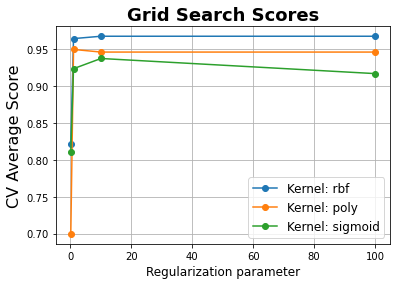

In [10]:
import matplotlib.pyplot as plt

# Plotting hasil GridSearchCV
rbf_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'rbf'].to_numpy()
poly_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'poly'].to_numpy()
sigmoid_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'sigmoid'].to_numpy()

scores_mean = np.concatenate((rbf_score, poly_score, sigmoid_score))

def plot_grid_search(scores_mean, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label=name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=12)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=12)
    ax.grid('on')

# Calling Method 
plot_grid_search(scores_mean, param_grid['C'], param_grid['kernel'], 'Regularization parameter', 'Kernel')

In [11]:
from sklearn.svm import SVC

clf = SVC(C=0.1, kernel='sigmoid')
model = clf.fit(X_train_resampled,y_train_resampled)

# Evaluation

In [12]:
predictions = model.predict(X_test_tfidf)

In [13]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 5  0  1  1  1  0  0  0  0  1  0  0  4]
 [ 0  9  0  0  0  0  2  3  0  0  1  0  0]
 [ 0  0 19  0  1  0  0  1  6  0  0  0  0]
 [ 0  0  1 10 11  0  0  1  0  0  0  0  1]
 [ 0  0  0  3 19  0  0  0  0  0  0  0  0]
 [ 0  7  0  3  0 15  6  0  0  0  0  0  0]
 [ 0  2  0  0  0  6  5  3  0  0  7  0  0]
 [ 0  0  1  0  0  0  0 80  0  0  5  1  1]
 [ 0  1  7  0  1  0  0  0 24  0  0  0  0]
 [ 1  0  0  0  2  0  0  0  0  3  0  0  1]
 [ 0  2  0  0  0  0  1 21  0  0 38  0  0]
 [ 0  0  4  2  1  0  0  0  0  0  0 14  0]
 [ 3  0  1  1  0  0  0  0  0  0  0  1  8]]


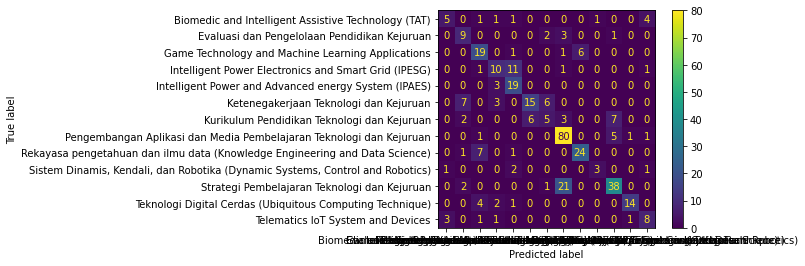

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [15]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.56      0.38      0.45        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.43      0.60      0.50        15
                            Game Technology and Machine Learning Applications       0.56      0.70      0.62        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.50      0.42      0.45        24
                         Intelligent Power and Advanced energy System (IPAES)       0.53      0.86      0.66        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.71      0.48      0.58        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.36      0.22      0.27        23
          Pengembangan Aplikasi dan Media Pembe

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6552631578947369
Precision score :  0.6604794315118612
Recall score :  0.6552631578947369
F1 score :  0.6457914307897276


# Export Model

In [17]:
from joblib import dump

dump(model, filename="svm-model.joblib")

['svm-model.joblib']